### Внесување на потребните библиотеки за работа.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn.svm import SVR
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

from sklearn.decomposition import PCA, KernelPCA

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Читање на множеството.

In [36]:
df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [37]:
df.shape

(517, 13)

Гледаме дали во множеството имаме null вредности.

In [63]:
df.isna().sum().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


Визуелизација на дата преку "heatmap".

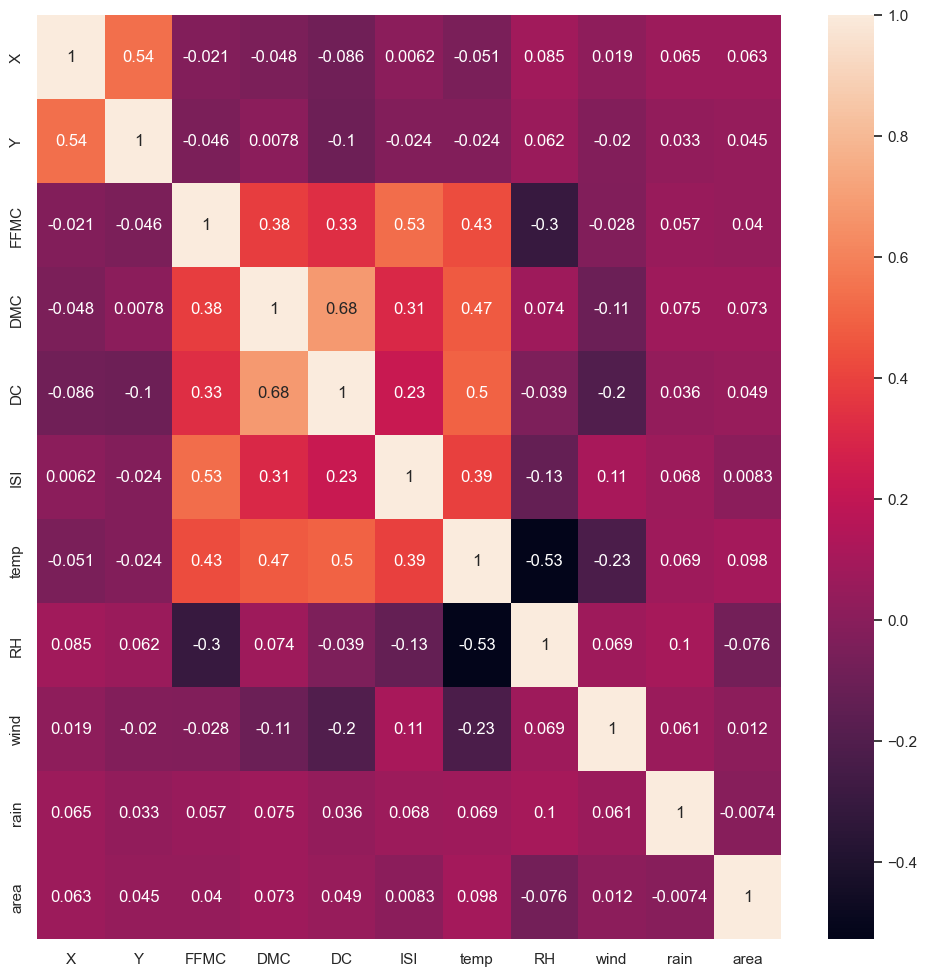

In [42]:
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap of the features in the dataset
plt.rcParams['figure.figsize'] = [12, 12]
sns.set(font_scale = 1)
sns.heatmap(numeric_df.corr(), annot = True);

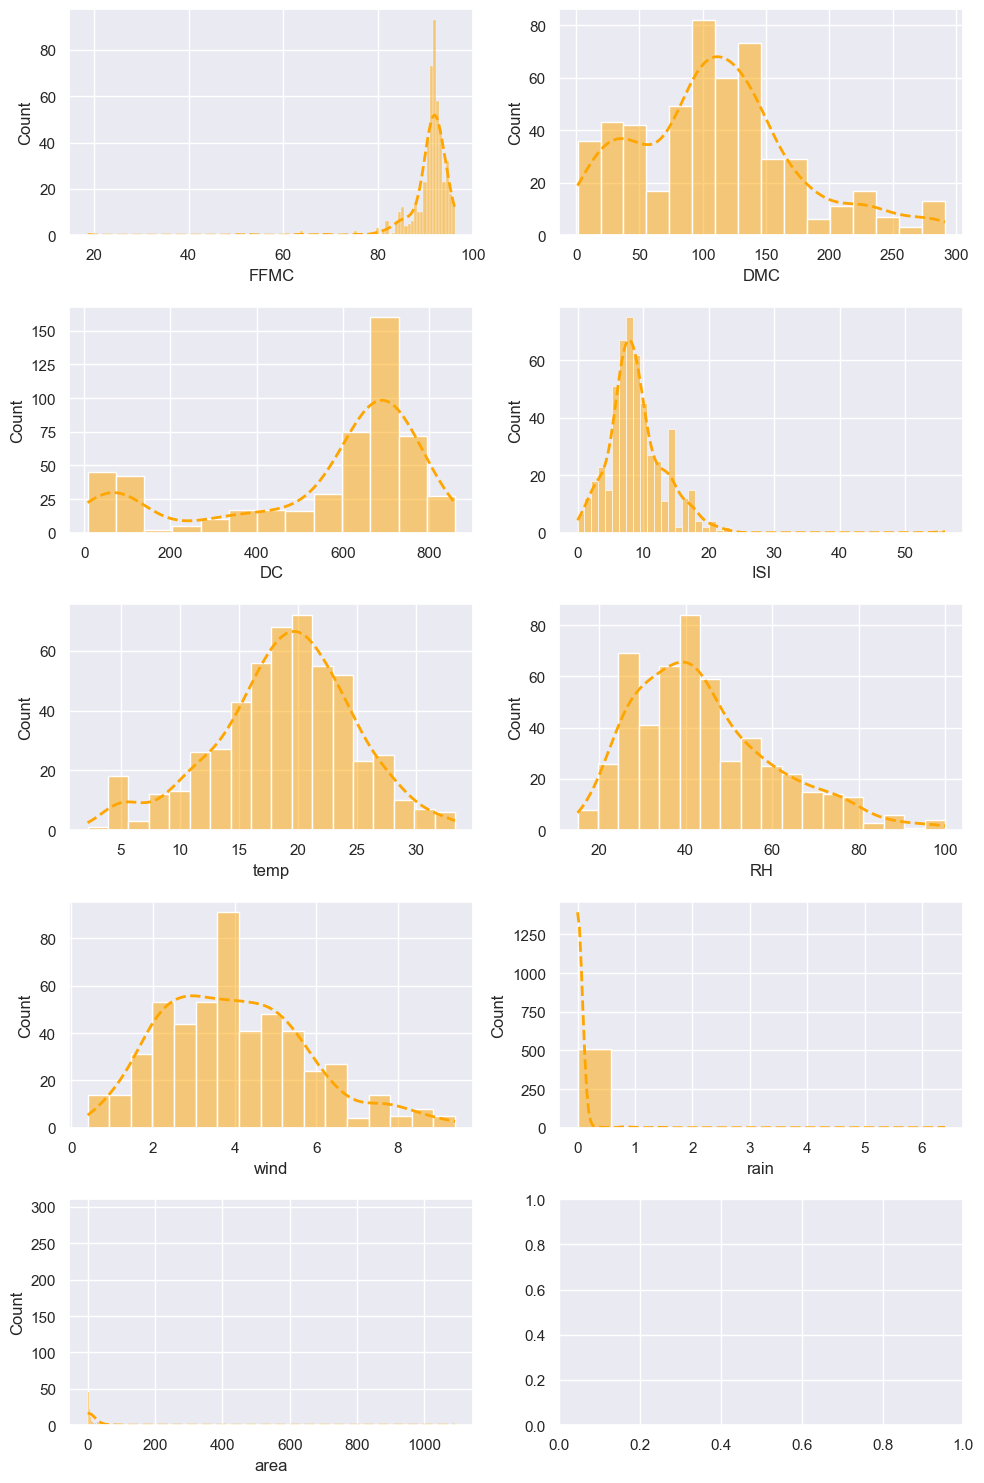

In [44]:
num_cols = df.select_dtypes(include='number').columns

fig, axs =  plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[2:]):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'linewidth':2, 'linestyle':'--'}, color='orange')

plt.tight_layout()
plt.show()

При разгледување на погорните графици можеме да забележеме дека колоните FFMC и ISI имаат преголем број на вредности кои можемем да ги класифицираме како "outliers". Затоа ќе ги отстранеме тие вредности за да добиеме попрегледно множество.

In [45]:
mask = (df.FFMC<80)|(df.ISI>25)

df = df.loc[~mask]
df.shape

(504, 13)

Повторно ја правеме истата визуелизација со графиците за да ја забележеме разликата по отстранување на тие "outliers"

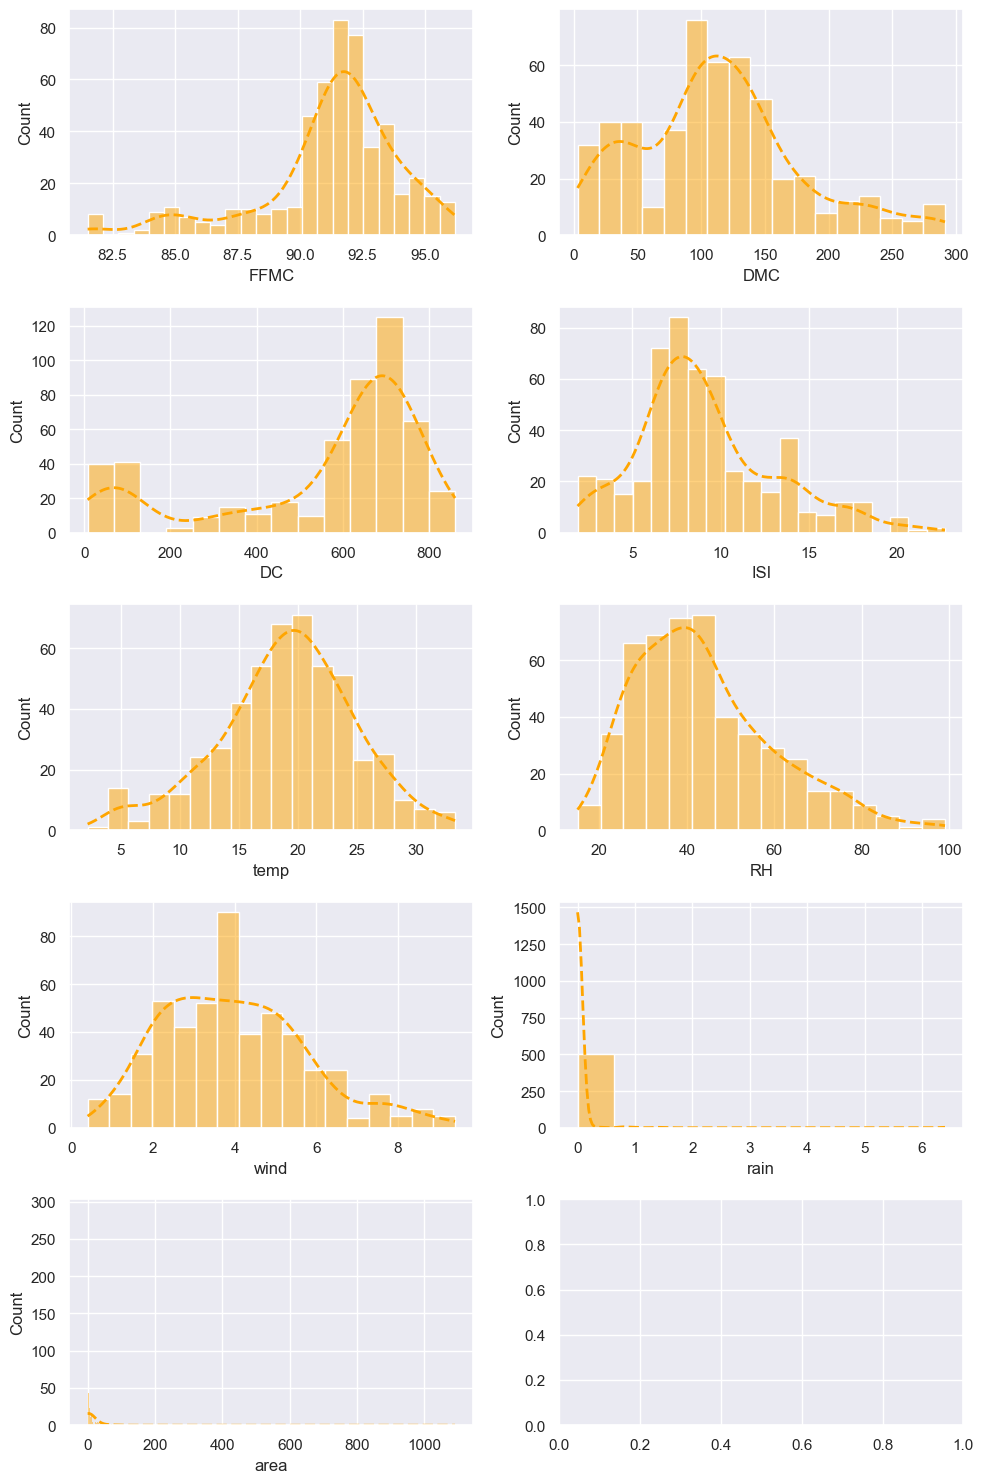

In [46]:
num_cols = df.select_dtypes(include='number').columns

fig, axs =  plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[2:]):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'linewidth':2, 'linestyle':'--'}, color='orange')

plt.tight_layout()
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 515
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       504 non-null    int64  
 1   Y       504 non-null    int64  
 2   month   504 non-null    int64  
 3   day     504 non-null    int64  
 4   FFMC    504 non-null    float64
 5   DMC     504 non-null    float64
 6   DC      504 non-null    float64
 7   ISI     504 non-null    float64
 8   temp    504 non-null    float64
 9   RH      504 non-null    int64  
 10  wind    504 non-null    float64
 11  rain    504 non-null    float64
 12  area    504 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 55.1 KB


In [51]:
features, target = df.drop('area', axis=1).values, df['area'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

Ги препроцесираме податоците пред да извршеме анализа со различни типови на регресија.

In [65]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [66]:
def model_results(model, X_train, y_train):
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.3f}\n")
    print(f"r2: {r2_score(y_train, predictions)}\n")
    print(f"mse: {mse}\n")


In [67]:
linear_reg = LinearRegression()

model_results(linear_reg, X_train_scaled, y_train_log)

RMSE: 1.371

r2: 0.055133421058544685

mse: 1.8808366436525545



In [71]:
from sklearn.svm import SVR

svr = SVR()
model_results(svr, X_train_scaled, y_train_log)

RMSE: 1.361

r2: 0.06954937003164396

mse: 1.8521404809498727



In [72]:
elastic_net_CV = ElasticNetCV(alphas=[0.2], random_state=101)
model_results(elastic_net_CV, X_train_scaled, y_train_log)

RMSE: 1.403

r2: 0.011673341551212801

mse: 1.967347598633118



In [73]:
lassoCV = LassoCV(alphas=[0.2], random_state=101)

model_results(lasso, X_train_scaled, y_train_log)

RMSE: 1.411

r2: 0.0

mse: 1.990584369869106



In [74]:
ridgeCV = RidgeCV(alphas=[0.2], cv=5)

model_results(ridgeCV, X_train_scaled, y_train_log)


RMSE: 1.371

r2: 0.055132508168364014

mse: 1.8808384608374797



Според горните анализи направени при повеќе вида на регресија, можеме да забележеме дека SVR(Support Vector Machines) има најниски RMSE и MSE вредности, и највисока r squared вредност што значи дека би била најефикасна.